## Расчет КПД термодинамического цикла

In [39]:
import test as wsp
import matplotlib.pyplot as pl
import numpy as np
from coursache import tex_exp, print_latex

# P_f = 1088538.1638538  # 11.1 кгс/см² https://fis.bobrodobro.ru/8395
P_f = 980665.01248092  # 10 кгс/см² из https://ru.wikipedia.org/wiki/%D0%9A-1000-60/1500

# h
T_h = 220 + 273
# P_h = wsp.wspPST(T_h)
P_h = 5.9 * 10 ** 6
S_h = wsp.wspSSWT(T_h)
H_h = wsp.wspHSWT(T_h)

# b
P_b = P_h
T_b = wsp.wspTSP(P_b)
S_b = wsp.wspSSWT(T_b)
H_b = wsp.wspHSWT(T_b)

# c
P_c = P_b
T_c = T_b
S_c = wsp.wspSSST(T_c)
H_c = wsp.wspHSST(T_c)

# d
P_d = P_f
T_d = wsp.wspTSP(P_d)
S_d = S_c
H_d = wsp.wspHPS(P_d, S_d)
x_d = wsp.wspXPS(P_d, S_d)

# f
T_f = 250 + 273
S_f = wsp.wspSPT(P_f, T_f)
H_f = wsp.wspHPT(P_f, T_f)

# k
P_k = 4381 # 5883.9900748855 # конденсаторах типа К-22550. из https://leg.co.ua/arhiv/generaciya/ekspluatacionnye-rezhimy-vodo-vodyanyh-energeticheskih-reaktorov-33.html старое значение
x_k = x_d
T_k = wsp.wspTSP(P_k) - 2
S_k = S_f
H_k = wsp.wspHPS(P_k, S_k)


# e
T_e = T_d
P_e = P_d
S_e = wsp.wspSSST(T_e)
H_e = wsp.wspHSST(T_e)


# k'
P_k1 = P_k
T_k1 = T_k
S_k1 = wsp.wspSSWT(T_k1)
H_k1 = wsp.wspHSWT(T_k1)

# a
P_a = P_b
T_a = T_k
S_a = wsp.wspSPT(P_a, T_a)
H_a = wsp.wspHPS(P_a, S_a)

# g
T_g = T_d
P_g = P_d
S_g = wsp.wspSSWT(T_g)
H_g = wsp.wspHSWT(T_g)

n = 7
Q_el = 1000 * 10 ** 6 # Вт

import tabulate
from IPython.display import Latex, Math
display(tabulate.tabulate(
    {"Точка": ['h', 'b', 'c', 'd', 'e', 'f', 'k', 'k`', 'a', 'g'],
     "P":     np.array([P_h, P_b, P_c, P_d, P_e, P_f, P_k, P_k1, P_a, P_g]) * 10 ** -6,
     "T":     np.array([T_h, T_b, T_c, T_d, T_e, T_f, T_k, T_k1, T_a, T_g]) - 273,
     "S":     np.array([S_h, S_b, S_c, S_d, S_e, S_f, S_k, S_k1, S_a, S_g]),
     "H":     np.array([H_h, H_b, H_c, H_d, H_e, H_f, H_k, H_k1, H_a, H_g]) * 10 ** -3},
    tablefmt="html", headers="keys"))
Math(f"x_d = {tex_exp(x_d)}")

Точка,P,T,S,H
h,5.9,220,2516.43,942.948
b,5.9,274.642,3017.38,1208.09
c,5.9,274.642,5898.01,2785.64
d,0.980665,179.189,5898.01,2462.69
e,0.980665,179.189,6591.71,2776.38
f,0.980665,250,6936.05,2943.61
k,0.004381,28.6935,6936.05,2099.52
k`,0.004381,28.6935,416.66,119.656
a,5.9,28.6935,414.931,125.046
g,0.980665,179.189,2130.22,758.945


<IPython.core.display.Math object>

In [2]:
wsp.wspTSP(P_k) - 2 - 273

28.693548695652794

In [3]:
tex_table = fr"""
\begin{{table}}[H]
	\caption{{Значения параметров TS-диаграммы}}
	\begin{{center}}
        \begin{{tabular}}{{|c|c|c|c|c|}}
        \toprule
         Точка & P, МПа & T, $^\circ C$ & S, Дж/(кг $\cdot$ К) & h, кДж/кг \\ 
         \midrule
         \hline
          h & {P_h * 10 ** (-6):.01f} & {T_h -273} &  {S_h:.02f} & {H_h:.02f}\\ 
         \hline
          b & {P_b * 10 ** (-6):.01f} & {T_b - 273:.01f} & {S_b:.02f} & {H_b} \\ 
         \hline
          c & {P_c} & {T_c} & {S_c} & {H_c}\\ 
         \hline
          d & {P_d} & {T_d} & {S_d} & {H_d} \\ 
         \hline
          e & {P_e} & {T_e} & {S_e} & {H_e} \\ 
         \hline
          f & {P_f} & {T_f}  & {S_f} & {H_e} \\ 
         \hline
          k & {P_k} & {T_k} & {S_k} & {H_k} \\ 
         \hline
          k′ & {P_k1} & {T_k1} & {S_k1} & {H_k1} \\ 
         \hline
          a & {P_a} & {T_a} & {S_a} & {H_a} \\ 
         \hline
          g & {P_g} & {T_g} &  {S_g} & {H_g} \\ 
         \bottomrule
		\end{{tabular}}
		\label{{tabular:coeffs}}
	\end{{center}}
\end{{table}}
"""
Latex(tex_table)

<IPython.core.display.Latex object>

In [4]:
eta_t0 = 1 - ((T_k * (S_f - S_a) * x_d) / 
          # -------------------------------------------------
            ((H_c - H_g) + x_d * ((H_g - H_a) + (H_f - H_e))))

eta_t0_formulas = r"""
1 - 
\frac{T_{k} ⋅ \left( s_{f} - s_{a} \right) ⋅ x_{d}}
{\left( h_{c} - h_{g} \right) +x_{d}\left( \left( h_{g} - h_{a} \right) + \left( h_{f} - h_{e} \right) \right)}
"""

eta_t0_nums = fr"""
1 - 
\frac{{{tex_exp(T_k)} ⋅ \left( {tex_exp(S_f)} - {tex_exp(S_a)} \right) ⋅ {tex_exp(x_d)}}}
{{\left( {tex_exp(H_c)} - {tex_exp(H_g)} \right) + {tex_exp(x_d)} \left( \left( {tex_exp(H_g)} - {tex_exp(H_a)} \right) + \left( {tex_exp(H_f)} - {tex_exp(H_e)} \right) \right)}}
"""

final_code = fr"\begin{{align}} \eta_{{t0}}=&{eta_t0_formulas}=\\=&{eta_t0_nums}=\\=&{tex_exp(eta_t0)}\end{{align}}"

print(final_code)
display(Math(final_code))


\begin{align} \eta_{t0}=&
1 - 
\frac{T_{k} ⋅ \left( s_{f} - s_{a} \right) ⋅ x_{d}}
{\left( h_{c} - h_{g} \right) +x_{d}\left( \left( h_{g} - h_{a} \right) + \left( h_{f} - h_{e} \right) \right)}
=\\=&
1 - 
\frac{3.017 \cdot 10^{ 2 } ⋅ \left( 6.936 \cdot 10^{ 3 } - 4.149 \cdot 10^{ 2 } \right) ⋅ 8.445 \cdot 10^{ -01 }}
{\left( 2.786 \cdot 10^{ 6 } - 7.589 \cdot 10^{ 5 } \right) + 8.445 \cdot 10^{ -01 } \left( \left( 7.589 \cdot 10^{ 5 } - 1.250 \cdot 10^{ 5 } \right) + \left( 2.944 \cdot 10^{ 6 } - 2.776 \cdot 10^{ 6 } \right) \right)}
=\\=&3.854 \cdot 10^{ -01 }\end{align}


<IPython.core.display.Math object>

In [5]:
eta_t_infty = 1 - ((T_k * (S_f - S_g) * (S_c - S_h)) /
                # ------------------------------------------------------
                 ((H_c - H_h) * (S_e - S_g) + (H_f - H_e) * (S_c - S_h)))

eta_t_infty_formula = r"""
1 -
\frac{T_{k} ⋅ \left( s_{f} - s_{g} \right) \left( s_{c} - s_{h} \right)}
{\left(h_{c} - h_{h}\right) ⋅ \left( s_{e} - s_{g} \right) + \left( h_{f} - h_{e} \right) ⋅ \left( s_{c} - s_{h} \right)}
"""

eta_t_infty_nums = fr"""
1 -
\frac{{{tex_exp(T_k)} ⋅ \left( {tex_exp(S_f)} - {tex_exp(S_g)} \right) \left( {tex_exp(S_c)} - {tex_exp(S_h)} \right)}}
{{\left({tex_exp(H_c)}) - {tex_exp(H_h)}\right) ⋅ \left( {tex_exp(S_e)} - {tex_exp(S_g)} \right) + \left( {tex_exp(H_f)} - {tex_exp(H_e)} \right) ⋅ \left( {tex_exp(S_c)} - {tex_exp(S_h)} \right)}}
"""

final_code = fr"\begin{{align}}η_{{t∞}}&={eta_t_infty_formula}=\\&={eta_t_infty_nums}=\\&={tex_exp(eta_t_infty)}\end{{align}}"
print(final_code)

Math(final_code)

\begin{align}η_{t∞}&=
1 -
\frac{T_{k} ⋅ \left( s_{f} - s_{g} \right) \left( s_{c} - s_{h} \right)}
{\left(h_{c} - h_{h}\right) ⋅ \left( s_{e} - s_{g} \right) + \left( h_{f} - h_{e} \right) ⋅ \left( s_{c} - s_{h} \right)}
=\\&=
1 -
\frac{3.017 \cdot 10^{ 2 } ⋅ \left( 6.936 \cdot 10^{ 3 } - 2.130 \cdot 10^{ 3 } \right) \left( 5.898 \cdot 10^{ 3 } - 2.516 \cdot 10^{ 3 } \right)}
{\left(2.786 \cdot 10^{ 6 }) - 9.429 \cdot 10^{ 5 }\right) ⋅ \left( 6.592 \cdot 10^{ 3 } - 2.130 \cdot 10^{ 3 } \right) + \left( 2.944 \cdot 10^{ 6 } - 2.776 \cdot 10^{ 6 } \right) ⋅ \left( 5.898 \cdot 10^{ 3 } - 2.516 \cdot 10^{ 3 } \right)}
=\\&=4.420 \cdot 10^{ -01 }\end{align}


<IPython.core.display.Math object>

In [6]:
eta_tn = eta_t0 + (eta_t_infty - eta_t0) * n / (n + 1)

eta_tn_formula = r"""
η_{tn} = η_{t0} + \left( η_{t∞} - η_{t0} \right) ⋅ \frac{n}{n+1}
"""

eta_tn_nums = fr"""
{tex_exp(eta_t0)} + \left( {tex_exp(eta_t_infty)} - {tex_exp(eta_t0)} \right) \cdot \frac{{{n}}}{{{n + 1}}}
"""

final_code = fr"{eta_tn_formula}={eta_tn_nums}={tex_exp(eta_tn)}"
print(final_code)

Math(final_code)


η_{tn} = η_{t0} + \left( η_{t∞} - η_{t0} \right) ⋅ \frac{n}{n+1}
=
3.854 \cdot 10^{ -01 } + \left( 4.420 \cdot 10^{ -01 } - 3.854 \cdot 10^{ -01 } \right) \cdot \frac{7}{8}
=4.349 \cdot 10^{ -01 }


<IPython.core.display.Math object>

In [7]:
eta_brutto = eta_tn * 0.85 * 0.98 * 0.98 * 0.97

eta_brutto_formula = r"""
\eta_{\text{брутто}} = \eta^7 \cdot \eta^{\text{вн}} \cdot \eta_{\text{ос}} \cdot \eta_{\text{эг}} \cdot \eta_{\text{мех}} = 0.335
"""

eta_brutto_nums = fr"{tex_exp(eta_tn)} \cdot 0.85 \cdot 0.98 \cdot 0.98 \cdot 0.97"
final_code=fr"{eta_brutto_formula}={eta_brutto_nums}={tex_exp(eta_brutto)}"
print(final_code)
Math(final_code)


\eta_{\text{брутто}} = \eta^7 \cdot \eta^{\text{вн}} \cdot \eta_{\text{ос}} \cdot \eta_{\text{эг}} \cdot \eta_{\text{мех}} = 0.335
=4.349 \cdot 10^{ -01 } \cdot 0.85 \cdot 0.98 \cdot 0.98 \cdot 0.97=3.444 \cdot 10^{ -01 }


<IPython.core.display.Math object>

In [8]:
Q_tep = Q_el / eta_brutto

final_code = fr"Q_{{\text{{теп}}}} = \frac{{Q_{{\text{{эл}}}}}}{{\eta_{{\text{{брутто}}}}}}=\frac{{ {tex_exp(Q_el)} }} {{ {tex_exp(eta_brutto)} }} = {tex_exp(Q_tep * 10 ** -6)} \text{{МВт}}"
Q_tep

print(final_code)
Math(final_code)

Q_{\text{теп}} = \frac{Q_{\text{эл}}}{\eta_{\text{брутто}}}=\frac{ 1.000 \cdot 10^{ 9 } } { 3.444 \cdot 10^{ -01 } } = 2.904 \cdot 10^{ 3 } \text{МВт}


<IPython.core.display.Math object>

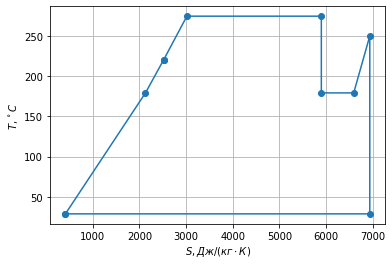

In [9]:
pl.plot([S_h, S_b, S_c, S_d, S_e, S_f, S_k, S_k1, S_a, S_g, S_h],
        np.array([T_h, T_b, T_c, T_d, T_e, T_f, T_k, T_k1, T_a, T_g, T_h]) - 273, '-o')
pl.grid()
pl.xlabel(r"$S, Дж/ (кг \cdot К)$")
pl.ylabel(r"$T,^\circ C$")
pl.savefig("TS_raw.svg")

## Расчет изменения теплового потока в наиболее нагруженном канале

In [10]:
K_r = 1.25
K_z = 1.5
N_tvs = 163
N_tvel = 317
H_az = 3.5 
q_max = Q_tep  * K_r * K_z / ( N_tvs * N_tvel * H_az )
q_max * 10 ** 4

q_max_formula = r"""
q_{max} = \frac {Q_{\text{теп}}K_r K_z}{N_{\text{ТВС}}N_{\text{твэл}}H_{\text{аз}}}  
"""

q_max_nums = fr"""
\frac 
{{ {tex_exp(Q_tep)} \cdot {K_r} \cdot {K_z}  }}
{{ {N_tvs} \cdot {N_tvel} \cdot {H_az} }}
"""

final_code = fr"{q_max_formula}={q_max_nums}={tex_exp(q_max / 100) } \frac {{\text{{Вт}}}} {{\text{{см}}}}"
print(final_code)
Math(final_code)


q_{max} = \frac {Q_{\text{теп}}K_r K_z}{N_{\text{ТВС}}N_{\text{твэл}}H_{\text{аз}}}  
=
\frac 
{ 2.904 \cdot 10^{ 9 } \cdot 1.25 \cdot 1.5  }
{ 163 \cdot 317 \cdot 3.5 }
=3.010 \cdot 10^{ 2 } \frac {\text{Вт}} {\text{см}}


<IPython.core.display.Math object>

## Распределение температуры теплоносителя по высоте 

In [11]:
P_az = 15.7 * 10 ** 6
T_az_vh = 287 + 273
T_az_vih = 320 + 273
H_vh = wsp.wspHPT(P_az, T_az_vh)
H_vih = wsp.wspHPT(P_az, T_az_vih)


G_tvs = (
            Q_tep           /
  # --------------------------
    ( (H_vih - H_vh) * N_tvs )
)

G_tvs_formula = r"""
G_{\text{ТВС}} = \frac {Q_{\text{теп}}} {(h_{\text{вых}} - h_{\text{вх}})N_{\text{ТВС}}}
"""

G_tvs_nums = fr"""
\frac {{ {tex_exp(Q_tep)} }} {{ ( { tex_exp(H_vih) } - { tex_exp(H_vh) }) \cdot {N_tvs} }} = {tex_exp(G_tvs)} \ \frac {{\text{{кг}}}}{{\text{{c}}}}
"""

final_code = f"{G_tvs_formula}={G_tvs_nums}"

print(final_code)
Math(final_code)



G_{\text{ТВС}} = \frac {Q_{\text{теп}}} {(h_{\text{вых}} - h_{\text{вх}})N_{\text{ТВС}}}
=
\frac { 2.904 \cdot 10^{ 9 } } { ( 1.452 \cdot 10^{ 6 } - 1.268 \cdot 10^{ 6 }) \cdot 163 } = 9.685 \cdot 10^{ 1 } \ \frac {\text{кг}}{\text{c}}



<IPython.core.display.Math object>

In [12]:
G_reak = (
            Q_tep           /
  # --------------------------
    ( (H_vih - H_vh) )
)

G_reak_formula = r"""
G_{\text{реак}} = \frac {Q_{\text{теп}}} {(h_{\text{вых}} - h_{\text{вх}})}
"""

G_reak_nums = fr"""
\frac {{ {tex_exp(Q_tep)} }} {{ ( { tex_exp(H_vih) } - { tex_exp(H_vh) }) }} = {tex_exp(G_reak)} \ \frac {{\text{{кг}}}}{{\text{{c}}}}
"""

final_code = f"{G_reak_formula}={G_reak_nums}"

print(final_code)
Math(final_code)


G_{\text{реак}} = \frac {Q_{\text{теп}}} {(h_{\text{вых}} - h_{\text{вх}})}
=
\frac { 2.904 \cdot 10^{ 9 } } { ( 1.452 \cdot 10^{ 6 } - 1.268 \cdot 10^{ 6 }) } = 1.579 \cdot 10^{ 4 } \ \frac {\text{кг}}{\text{c}}



<IPython.core.display.Math object>

In [13]:
C_p = (
      (H_vih - H_vh)  /
  # --------------------
    (T_az_vih - T_az_vh)
)

C_p_formula = r"""
C_p = \frac {h_{\text{вых}} - h_{\text{вх}}} {T_{\text{вых}} - T_{\text{вх}}}
"""

C_p_nums = fr"""
C_p = \frac {{ {tex_exp(H_vih)} - {tex_exp(H_vh)} }} {{ {tex_exp(T_az_vih)} - {tex_exp(T_az_vh)} }} = {tex_exp(C_p)} \ \frac{{ \text{{Дж}}}} {{ \text{{кг}} \cdot \text{{К}} }}
"""

final_code = f"{C_p_formula}={C_p_nums}"

print(final_code)
Math(final_code)


C_p = \frac {h_{\text{вых}} - h_{\text{вх}}} {T_{\text{вых}} - T_{\text{вх}}}
=
C_p = \frac { 1.452 \cdot 10^{ 6 } - 1.268 \cdot 10^{ 6 } } { 5.930 \cdot 10^{ 2 } - 5.600 \cdot 10^{ 2 } } = 5.574 \cdot 10^{ 3 } \ \frac{ \text{Дж}} { \text{кг} \cdot \text{К} }



<IPython.core.display.Math object>

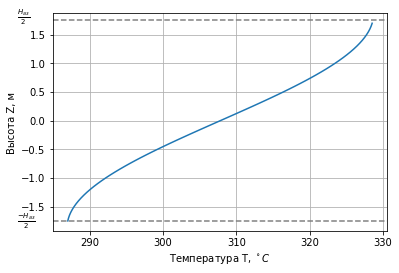

макс температура 328.5390975578629
запас до кипения 17.260902442137137


In [14]:
from math import pi, sin
H_eff = 3.715

def T(z): 
    return T_az_vh + (
        N_tvs * N_tvel * q_max * H_eff / (G_reak * C_p * pi) 
        * ( np.sin( pi * z / H_eff) + np.sin( pi * H_az / 2 / H_eff))
    )

Dz = np.arange(-H_az / 2 , H_az / 2, 0.05)

Et = T(Dz) - 273
pl.plot(Et, Dz)
pl.grid()
pl.xlabel(r"Температура T, $^\circ C$")
pl.ylabel(r"Высота Z, м")

pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
pl.axhline(H_az / 2, linestyle='--', color="grey")

pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
pl.axhline( - H_az / 2, linestyle='--', color="grey")

pl.savefig("Ttep_.png", dpi=200)
pl.show()

print(f"макс температура {Et.max()}")
print(f"запас до кипения {345.8 - Et.max()}")

## Расчет распроеделения температуры внешней стенки оболочки по высоте

In [15]:
a = 234 * 10 ** -3
delta_chehol = 1.5 * 10 ** -3
d_tv = 9.1 * 10 ** -3
D_nk = 12.6 * 10 ** -3
N_nk = 12
D_ck = 10.3 * 10 ** -3
S_proh = (
    np.sqrt(3)/2 * (a - 2 * delta_chehol) ** 2 
    - N_tvel * pi * d_tv ** 2 / 4
    - N_nk * pi * D_nk ** 2 / 4
    - D_ck ** 2 * pi / 4
)

S_proh_formula = r"""
S_{\text{прох}} =& \sqrt{3}/2(a - 2 \cdot \delta_{\text{чехла}})^2 - N_{\text{твэл}} \frac {\pi d^2_{\text{тв}}} {4} - N_{\text{н.к.}} \frac {\pi D_{\text{н.к}}^2} {4} - \frac {D_{\text{ц.к}}^2\pi}{4}
"""

S_proh_nums = fr"""
\sqrt{{3}}/2({tex_exp(a)} - 2 \cdot {delta_chehol})^2 - {tex_exp(N_tvel)} \frac {{ \pi ({tex_exp(d_tv)})^2 }} {{4}} - {tex_exp(N_nk)} \frac {{ \pi ({tex_exp(D_nk)}))^2}} {{4}} - \frac {{ ({tex_exp(D_ck)})^2\pi }} {{4}} =\\=& {tex_exp(S_proh * 10 ** 6 )} \text{{мм}}^2
"""

final_code = fr"\begin{{align*}}{S_proh_formula}=&\\=&{S_proh_nums}\end{{align*}}"
print(final_code)
Math(final_code)

\begin{align*}
S_{\text{прох}} =& \sqrt{3}/2(a - 2 \cdot \delta_{\text{чехла}})^2 - N_{\text{твэл}} \frac {\pi d^2_{\text{тв}}} {4} - N_{\text{н.к.}} \frac {\pi D_{\text{н.к}}^2} {4} - \frac {D_{\text{ц.к}}^2\pi}{4}
=&\\=&
\sqrt{3}/2(2.340 \cdot 10^{ -01 } - 2 \cdot 0.0015)^2 - 3.170 \cdot 10^{ 2 } \frac { \pi (9.100 \cdot 10^{ -03 })^2 } {4} - 1.200 \cdot 10^{ 1 } \frac { \pi (1.260 \cdot 10^{ -02 }))^2} {4} - \frac { (1.030 \cdot 10^{ -02 })^2\pi } {4} =\\=& 2.402 \cdot 10^{ 4 } \text{мм}^2
\end{align*}


<IPython.core.display.Math object>

In [16]:
П = (
    (2 * (a - 2 * delta_chehol) * np.sqrt(3))
    + N_tvel * pi * d_tv
    + N_nk * pi * D_nk
    + pi * D_ck
)

П_formula = r"""
\Pi=& (2(a-2\delta_{\text{чехла}})\sqrt{3}) - N_{\text {твэл }} \pi d_{\text {тв }}+N_{\text {н.к }} \pi D_{\text {н.к }}+\pi D_{\text {ц.к}}
"""

П_nums = fr"""
(2( \cdot {tex_exp(a)}-2 \cdot {tex_exp(delta_chehol)}) \cdot \sqrt{{3}}) - {tex_exp(N_tvel)} \cdot \pi \cdot {tex_exp(d_tv)} + {tex_exp(N_nk)} \cdot \pi \cdot {tex_exp(D_nk)} + \pi \cdot {tex_exp(D_ck)}= {tex_exp(П * 10 ** 3)} \text{{мм}}
"""

final_code = fr"\begin{{align*}}{П_formula}=&\\={П_nums}\end{{align*}}"
print(final_code)
Math(final_code)

\begin{align*}
\Pi=& (2(a-2\delta_{\text{чехла}})\sqrt{3}) - N_{\text {твэл }} \pi d_{\text {тв }}+N_{\text {н.к }} \pi D_{\text {н.к }}+\pi D_{\text {ц.к}}
=&\\=
(2( \cdot 2.340 \cdot 10^{ -01 }-2 \cdot 1.500 \cdot 10^{ -03 }) \cdot \sqrt{3}) - 3.170 \cdot 10^{ 2 } \cdot \pi \cdot 9.100 \cdot 10^{ -03 } + 1.200 \cdot 10^{ 1 } \cdot \pi \cdot 1.260 \cdot 10^{ -02 } + \pi \cdot 1.030 \cdot 10^{ -02 }= 1.037 \cdot 10^{ 4 } \text{мм}
\end{align*}


<IPython.core.display.Math object>

In [17]:
d_g = 4 * S_proh / П

d_g_formula = r"""
d_{\text{Г}} = \frac {4 S_{\text{прох}}}{\text{П}}
"""

d_g_nums = fr"""
\frac {{4 \cdot {tex_exp(S_proh)}}} {{{tex_exp(П)}}} = {tex_exp(d_g)}
"""

final_code = fr"{d_g_formula}={d_g_nums} \text{{мм}}"
print(final_code)
Math(final_code)


d_{\text{Г}} = \frac {4 S_{\text{прох}}}{\text{П}}
=
\frac {4 \cdot 2.402 \cdot 10^{ -02 }} {1.037 \cdot 10^{ 1 }} = 9.263 \cdot 10^{ -03 }
 \text{мм}


<IPython.core.display.Math object>

In [18]:
mu = 8.721 * 10 ** -5
lambda_ = 0.5536
Pr = 0.8729

Re_petukhov = (
    ( G_reak * d_g )    / 
   # --------------------
    ( N_tvs * S_proh * mu )
)

Re_petukhov
tex_exp(Re_petukhov)

'4.283 \\cdot 10^{ 5 }'

In [19]:
xi = (1.82 * np.log10(Re_petukhov) - 1.64) ** -2
xi

0.0134898337003546

In [20]:
k = 1 + 900 / Re_petukhov

Nu_petukhov = (
            ( xi / 8 * Re_petukhov * Pr )  /
    # ------------------------------------------------
      (k + 12.7 * (Pr ** (2 / 3) - 1) * np.sqrt(xi / 8))
)

Nu_petukhov_formula = r"""
\mathrm{Nu}=&\frac{\frac{\xi}{8} \cdot \mathrm{Re} \cdot \operatorname{Pr}}{k+12.7 \cdot\left(\operatorname{Pr}^{\frac{2}{3}}-1\right) \cdot \sqrt{\frac{\xi}{8}}}
"""

Nu_petukhov_nums = fr"""
\frac{{ 
    \frac{{{tex_exp(xi)}}}{{8}} \cdot {tex_exp(Re_petukhov)} \cdot {tex_exp(Pr)} 
}}
{{ 
    1 + \frac{{900}}{{{tex_exp(Re_petukhov)}}} + 12.7 \cdot\left(({tex_exp(Pr)})^{{\frac{{2}}{{3}}}}-1\right) \cdot \sqrt{{\frac{{{tex_exp(xi)}}}{{8}}}} 
}} = {tex_exp(Nu_petukhov)} 
"""
    
    
final_code = fr"\begin{{align*}}{Nu_petukhov_formula}=\\=&{Nu_petukhov_nums}\end{{align*}}"

print(final_code)
Math(final_code)

\begin{align*}
\mathrm{Nu}=&\frac{\frac{\xi}{8} \cdot \mathrm{Re} \cdot \operatorname{Pr}}{k+12.7 \cdot\left(\operatorname{Pr}^{\frac{2}{3}}-1\right) \cdot \sqrt{\frac{\xi}{8}}}
=\\=&
\frac{ 
    \frac{1.349 \cdot 10^{ -02 }}{8} \cdot 4.283 \cdot 10^{ 5 } \cdot 8.729 \cdot 10^{ -01 } 
}
{ 
    1 + \frac{900}{4.283 \cdot 10^{ 5 }} + 12.7 \cdot\left((8.729 \cdot 10^{ -01 })^{\frac{2}{3}}-1\right) \cdot \sqrt{\frac{1.349 \cdot 10^{ -02 }}{8}} 
} = 6.589 \cdot 10^{ 2 } 
\end{align*}


<IPython.core.display.Math object>

In [21]:
alpha_1 = Nu_petukhov * lambda_ / d_g

final_code = fr"\alpha_1 = \frac {{Nu \cdot \lambda}} {{d_\text{{г}}}} = \frac {{{tex_exp(Nu_petukhov)} \cdot {tex_exp(lambda_)}}}{{{tex_exp(d_g)}}} = {tex_exp(alpha_1)} \frac {{\text{{Вт}}}}{{\text{{м}}^2\cdot\mathrm{{K}}}}"
print(final_code)
Math(final_code)

\alpha_1 = \frac {Nu \cdot \lambda} {d_\text{г}} = \frac {6.589 \cdot 10^{ 2 } \cdot 5.536 \cdot 10^{ -01 }}{9.263 \cdot 10^{ -03 }} = 3.938 \cdot 10^{ 4 } \frac {\text{Вт}}{\text{м}^2\cdot\mathrm{K}}


<IPython.core.display.Math object>

In [22]:
Nu_dittus = 0.023 * Re_petukhov ** 0.8 * Pr ** 0.4
print(Nu_dittus)


alpha_2 = Nu_dittus * lambda_ / d_g

final_code = fr"\alpha_2 = \frac {{Nu \cdot \lambda}} {{d_\text{{г}}}} = \frac {{{tex_exp(Nu_dittus)} \cdot {tex_exp(lambda_)}}}{{{tex_exp(d_g)}}} = {tex_exp(alpha_2)} \frac {{\text{{Вт}}}}{{\text{{м}}^2\cdot\mathrm{{K}}}}"
print(final_code)
Math(final_code)

697.5124069562332
\alpha_2 = \frac {Nu \cdot \lambda} {d_\text{г}} = \frac {6.975 \cdot 10^{ 2 } \cdot 5.536 \cdot 10^{ -01 }}{9.263 \cdot 10^{ -03 }} = 4.169 \cdot 10^{ 4 } \frac {\text{Вт}}{\text{м}^2\cdot\mathrm{K}}


<IPython.core.display.Math object>

In [23]:
Nu_mikheev = 0.021 * Re_petukhov ** 0.8 * Pr ** 0.43
print(Nu_mikheev)

alpha_3 = Nu_mikheev * lambda_ / d_g

final_code = fr"\alpha_3 = \frac {{Nu \cdot \lambda}} {{d_\text{{г}}}} = \frac {{{tex_exp(Nu_mikheev)} \cdot {tex_exp(lambda_)}}}{{{tex_exp(d_g)}}} = {tex_exp(alpha_3)} \frac {{\text{{Вт}}}}{{\text{{м}}^2\cdot\mathrm{{K}}}}"
print(final_code)
Math(final_code)

634.2673129055883
\alpha_3 = \frac {Nu \cdot \lambda} {d_\text{г}} = \frac {6.343 \cdot 10^{ 2 } \cdot 5.536 \cdot 10^{ -01 }}{9.263 \cdot 10^{ -03 }} = 3.791 \cdot 10^{ 4 } \frac {\text{Вт}}{\text{м}^2\cdot\mathrm{K}}


<IPython.core.display.Math object>

In [24]:
# S_m = 12.75 * 10 ** -3
alpha = (alpha_1 + alpha_2 + alpha_3) / 3
alpha
tex_exp(alpha)


'3.966 \\cdot 10^{ 4 }'

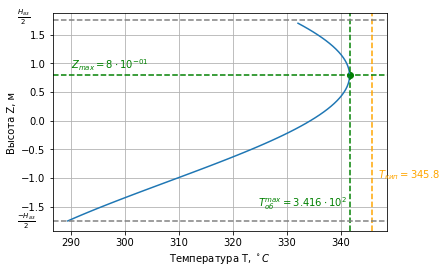

In [25]:
def T_ob(z): 
    return (
    T(z) + (q_max * np.cos(pi * z / H_eff)) / (pi * d_tv * alpha)
)

Dz = np.arange(-H_az / 2 , H_az / 2, 0.05)

Et = T_ob(Dz) - 273
pl.plot(Et, Dz)
pl.grid()
pl.xlabel(r"Температура T, $^\circ C$")
pl.ylabel(r"Высота Z, м")

# pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
# pl.axhline(H_az / 2, linestyle='--', color="grey")

# pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
# pl.axhline( - H_az / 2, linestyle='--', color="grey")
# pl.show()

# print(f"макс температура {Et.max()}")
# print(f"запас до кипения {345.8 - Et.max()}")
pl.axvline(345.8, color="orange", linestyle="--")
pl.axvline(Et.max(), color="green", linestyle="--")
pl.text(Et.max() - 17, -1.5, fr"$T_{{об}}^{{max}}={tex_exp(Et.max())}$", color="green")
z_max = max(stats := {x: y for x, y in zip(Dz, Et)}, key=stats.get)
pl.axhline(z_max, linestyle="--", color="green")
pl.text(290, z_max + 0.1, fr"$Z_{{max}}={tex_exp(z_max, after_comma=0)}$", color="green")
pl.scatter(Et.max(), z_max, color="green")
pl.text(345.8 + 1, -1.0, "$T_{кип}=345.8$", color="orange")
pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
pl.axhline(H_az / 2, linestyle='--', color="grey")

pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
pl.axhline( - H_az / 2, linestyle='--', color="grey")
pl.savefig("Tob_.png", dpi=200)

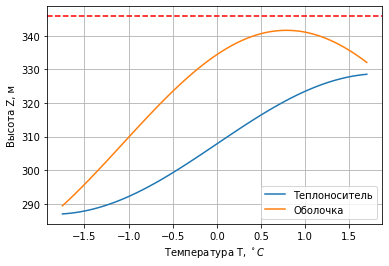

In [26]:
pl.plot(Dz, T(Dz) - 273, label="Теплоноситель")
pl.plot(Dz, T_ob(Dz) - 273, label="Оболочка")
pl.legend()
pl.grid()
pl.xlabel(r"Температура T, $^\circ C$")
pl.ylabel(r"Высота Z, м")
pl.axhline(345.8, color="red", linestyle="--")
pl.savefig("Tobltep_.png", dpi=200)

## Расчет температуры топлива


## Расчет температуры топлива

In [27]:
lambda_gz = 0.35
lambda_ob = 20.1
lambda_top = 3.5
# delta_gz = 

In [28]:
delta_tvel = 0.65 * 10 ** -3
d_top = 7.53 * 10 ** -3
d_otv = 1.3 * 10 ** -3
delta_ob = 0.65 * 10 ** -3

Ri = (
    np.log(d_tv / (d_tv - 2 * delta_ob)) / (2 * pi * lambda_ob) 
    + np.log((d_tv - 2 * delta_ob) / d_top) / (2 * pi * lambda_gz) 
    + (0.5 - d_otv ** 2 / (d_top ** 2 - d_otv ** 2) * np.log(d_top / d_otv)) / (2 * pi * lambda_top)
)

Ri_formula = r"""
\sum R_i =& 
\frac {\ln \frac {d_{\text{тв}}}{d_{\text{тв}} - 2\delta_{об}}  }{2\pi\lambda_{\text{об}}}+\frac {\ln \frac {d_{\text{тв}} - 2\delta_{об}}{d_{\text{топ}}}  }{2\pi\lambda_{\text{г.з}}}+\frac {\frac 1 2 - \frac {d_{\text{отв}}^2} {d_{\text{топ}}^2 - d_{\text{отв}}^2}\ln \frac {d_{\text{топ}}}{d_{\text{отв}}}} {2 \pi \lambda_{\text{топ}}} =
"""

Ri_nums = fr"""
\frac {{\ln \frac{{ {tex_exp(d_tv)} }}{{ {tex_exp(d_tv)} - 2 \cdot {tex_exp(delta_ob)}}} }} {{2\cdot \pi \cdot {tex_exp(lambda_ob)}}}

+ \frac {{\ln \frac {{{tex_exp(d_tv)} - 2 \cdot {tex_exp(delta_ob)}}}{{{tex_exp(d_top)}}} }} {{2 \pi \cdot {tex_exp(lambda_gz)}}}

+ \frac {{ 0.5 - \frac{{ ({tex_exp(d_otv)})^2 }}{{ ({tex_exp(d_top)})^2 - ({tex_exp(d_otv)})^2 }} \ln \frac {{ {tex_exp(d_top)} }}{{ {tex_exp(d_otv)} }} }} {{2 \pi \cdot {tex_exp(lambda_top)} }}
"""
final_code = fr"\begin{{align*}}{Ri_formula}=\\=&{Ri_nums}=\\=&{tex_exp(Ri)} \frac {{\text{{м}} \cdot K}}{{\text{{Вт}}}}\end{{align*}}"
print(final_code)
Math(final_code)

\begin{align*}
\sum R_i =& 
\frac {\ln \frac {d_{\text{тв}}}{d_{\text{тв}} - 2\delta_{об}}  }{2\pi\lambda_{\text{об}}}+\frac {\ln \frac {d_{\text{тв}} - 2\delta_{об}}{d_{\text{топ}}}  }{2\pi\lambda_{\text{г.з}}}+\frac {\frac 1 2 - \frac {d_{\text{отв}}^2} {d_{\text{топ}}^2 - d_{\text{отв}}^2}\ln \frac {d_{\text{топ}}}{d_{\text{отв}}}} {2 \pi \lambda_{\text{топ}}} =
=\\=&
\frac {\ln \frac{ 9.100 \cdot 10^{ -03 } }{ 9.100 \cdot 10^{ -03 } - 2 \cdot 6.500 \cdot 10^{ -04 }} } {2\cdot \pi \cdot 2.010 \cdot 10^{ 1 }}

+ \frac {\ln \frac {9.100 \cdot 10^{ -03 } - 2 \cdot 6.500 \cdot 10^{ -04 }}{7.530 \cdot 10^{ -03 }} } {2 \pi \cdot 3.500 \cdot 10^{ -01 }}

+ \frac { 0.5 - \frac{ (1.300 \cdot 10^{ -03 })^2 }{ (7.530 \cdot 10^{ -03 })^2 - (1.300 \cdot 10^{ -03 })^2 } \ln \frac { 7.530 \cdot 10^{ -03 } }{ 1.300 \cdot 10^{ -03 } } } {2 \pi \cdot 3.500  }
=\\=&3.752 \cdot 10^{ -02 } \frac {\text{м} \cdot K}{\text{Вт}}\end{align*}


<IPython.core.display.Math object>

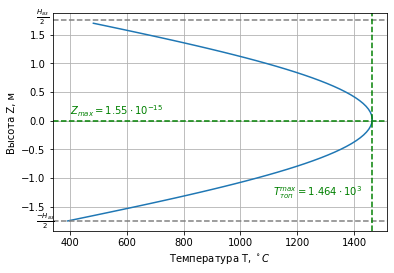

In [29]:
def T_top(z): 
    return (
    T_ob(z) + Ri * q_max * np.cos(pi * z / H_eff)
)

Dz = np.arange(-H_az / 2 , H_az / 2, 0.05)

Et = T_top(Dz) - 273
pl.plot(Et, Dz)
pl.grid()
pl.xlabel(r"Температура T, $^\circ C$")
pl.ylabel(r"Высота Z, м")

# pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
# pl.axhline(H_az / 2, linestyle='--', color="grey")

# pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
# pl.axhline( - H_az / 2, linestyle='--', color="grey")
# pl.show()

# print(f"макс температура {Et.max()}")
# print(f"запас до кипения {345.8 - Et.max()}")
# pl.axvline(Et.max(), color="green", linestyle="--")
# pl.text(Et.max() - 17, -1.5, fr"$T_{{об}}^{{max}}={tex_exp(Et.max())}$", color="green")
# z_max = max(stats := {x: y for x, y in zip(Dz, Et)}, key=stats.get)
# pl.axhline(z_max, linestyle="--", color="green")
# pl.text(290, z_max + 0.1, fr"$Z_{{max}}={tex_exp(z_max, after_comma=0)}$", color="green")
# pl.scatter(Et.max(), z_max, color="green")
# pl.text(345.8 + 1, -1.0, "$T_{кип}=345.8$", color="orange")
pl.text(280, H_az / 2, r"$\frac{H_{аз}}{2}$")
pl.axhline(H_az / 2, linestyle='--', color="grey")

pl.text(280,  - H_az / 2  - 0.07, r"$\frac{ - H_{аз}}{2}$")
pl.axhline( - H_az / 2, linestyle='--', color="grey")
pl.axvline(Et.max(), color="green", linestyle="--")
pl.text(Et.max() - 350, -1.3, f"$T^{{max}}_{{топ}}={tex_exp(Et.max())}$", color="green")
z_max = max(stats := {x: y for x, y in zip(Dz, Et)}, key=stats.get)
pl.axhline(z_max, linestyle="--", color="green")
pl.text(400, z_max + 0.1, fr"$Z_{{max}}={tex_exp(z_max, after_comma=2)}$", color="green")
pl.savefig("Ttop_.png", dpi=200)

In [30]:
z_max

1.5543122344752192e-15

## Определение перепадов давления и необходимой мощности насосов на прокачку

In [31]:
rho_vih = 680.8
rho_vh = 752.1
rho_sr = (rho_vh + rho_vih) / 2
w = G_reak / rho_sr / S_proh / N_tvs

final_code = (
r"w = \frac{G_{\text{реак}}}{\rho_{\text{ср}} \cdot S_{\text{прох}} \cdot N_{\text{ТВС}}}"
fr"= \frac {{{tex_exp(G_reak)}}} {{{tex_exp(rho_sr)} \cdot {tex_exp(S_proh)} \cdot {tex_exp(N_tvs)}}} = {tex_exp(w)}"
r"\ \text{м} /\text{c}"
)

print(final_code)
Math(final_code)

w = \frac{G_{\text{реак}}}{\rho_{\text{ср}} \cdot S_{\text{прох}} \cdot N_{\text{ТВС}}}= \frac {1.579 \cdot 10^{ 4 }} {7.165 \cdot 10^{ 2 } \cdot 2.402 \cdot 10^{ -02 } \cdot 1.630 \cdot 10^{ 2 }} = 5.629 \ \text{м} /\text{c}


<IPython.core.display.Math object>

In [32]:
# w = 5.6
rho_vih = 680.8
rho_vh = 752.1
rho_sr = (rho_vh + rho_vih) / 2
w = G_tvs / rho_sr / S_proh
Delta_P_tr = xi * H_az / d_g * w ** 2 / 2 * rho_sr
Delta_P_tr_formula = r"""
\Delta P_{\text{тр}}=\xi_{\text{тр}}\cdot\frac{H_{\text{аз}}}{d_{\text{г}}}\cdot \frac {w^2}{2}\rho
"""

Delta_P_tr_nums = fr"""
{tex_exp(xi)} \frac {{{tex_exp(H_az)}}} {{{tex_exp(d_g)}}} \cdot \frac {{({tex_exp(w)})^2}} {{2}} \cdot {tex_exp(rho_sr)}
"""

final_code = fr"""
{Delta_P_tr_formula}={Delta_P_tr_nums}={tex_exp(Delta_P_tr)} \text{{Па}}
"""
print(final_code)
Math(final_code)



\Delta P_{\text{тр}}=\xi_{\text{тр}}\cdot\frac{H_{\text{аз}}}{d_{\text{г}}}\cdot \frac {w^2}{2}\rho
=
1.349 \cdot 10^{ -02 } \frac {3.500 } {9.263 \cdot 10^{ -03 }} \cdot \frac {(5.629 )^2} {2} \cdot 7.165 \cdot 10^{ 2 }
=5.785 \cdot 10^{ 4 } \text{Па}



<IPython.core.display.Math object>

In [33]:
Delta_P_usk = ( G_reak  / (N_tvs * S_proh)) ** 2 * (1 / rho_vih - 1 / rho_vh)
Delta_P_usk

Delta_P_usk_formula = r"""
\Delta P_{\mathrm{уск}} = \left( \frac{G_{\text{реак}}}{N_{\mathrm{TBC}} \cdot S_{\mathrm{npox}}} \right)^{2} \cdot \left(\frac{1}{\rho_{\mathrm{вых}}} - \frac{1}{\rho_{\mathrm{вx}}} \right)

"""

Delta_P_usk_nums = fr"""
\left( \frac{{ {tex_exp(G_reak)} }} {{ {tex_exp(N_tvs)} \cdot {tex_exp(S_proh)} }} \right)^2 \cdot \left(\frac 1 {{ {tex_exp(rho_vih)} }} - \frac 1  {{ {tex_exp(rho_vh)} }} \right) =  {tex_exp(Delta_P_usk)} \text{{Па}}
"""

final_code = fr"\begin{{multline}}{Delta_P_usk_formula}= \\ = {Delta_P_usk_nums}\end{{multline}}"
print(final_code)
Math(final_code)

\begin{multline}
\Delta P_{\mathrm{уск}} = \left( \frac{G_{\text{реак}}}{N_{\mathrm{TBC}} \cdot S_{\mathrm{npox}}} \right)^{2} \cdot \left(\frac{1}{\rho_{\mathrm{вых}}} - \frac{1}{\rho_{\mathrm{вx}}} \right)

= \\ = 
\left( \frac{ 1.579 \cdot 10^{ 4 } } { 1.630 \cdot 10^{ 2 } \cdot 2.402 \cdot 10^{ -02 } } \right)^2 \cdot \left(\frac 1 { 6.808 \cdot 10^{ 2 } } - \frac 1  { 7.521 \cdot 10^{ 2 } } \right) =  2.265 \cdot 10^{ 3 } \text{Па}
\end{multline}


<IPython.core.display.Math object>

In [34]:
Delta_P_niv = rho_sr * 9.80665*H_az

Delta_P_niv_formula = r"""
\Delta P_{\text{нив}} = \rho_{\text{ср}} \cdot g \cdot H_{\text{аз}}
"""

Delta_P_niv_nums = fr"""
{tex_exp(rho_sr)} \cdot 9.807 \cdot {tex_exp(H_az)} = {tex_exp(Delta_P_niv)} \text{{Па}}
"""

final_code = f"{Delta_P_niv_formula}={Delta_P_niv_nums}"
print(final_code)
Math(final_code)


\Delta P_{\text{нив}} = \rho_{\text{ср}} \cdot g \cdot H_{\text{аз}}
=
7.165 \cdot 10^{ 2 } \cdot 9.807 \cdot 3.500  = 2.459 \cdot 10^{ 4 } \text{Па}



<IPython.core.display.Math object>

In [35]:
Delta_P_mest = (G_reak / (N_tvs * S_proh)) ** 2 / 2 * (2.6 / rho_vh + 13 * 0.45 / rho_sr + 0.26 / rho_vih)
Delta_P_mest_nums = fr"""
\Delta P_{{\text{{мест}}}} = \frac{{ \left( \frac{{{tex_exp(G_reak)}}} {{{N_tvs} \cdot {tex_exp(S_proh)} }}  \right)^2 }} {{2}} \cdot \left( \frac{{ 2.6 }}{{ {tex_exp(rho_vh)} }} +\frac{{ 13 \cdot 0.45 }}{{{tex_exp(rho_sr)}}}+\frac{{0.26}} {{ {tex_exp(rho_vih)} }} \right) = {tex_exp(Delta_P_mest)} \text{{Па}}
"""
print(Delta_P_mest_nums)
Math(Delta_P_mest_nums)


\Delta P_{\text{мест}} = \frac{ \left( \frac{1.579 \cdot 10^{ 4 }} {163 \cdot 2.402 \cdot 10^{ -02 } }  \right)^2 } {2} \cdot \left( \frac{ 2.6 }{ 7.521 \cdot 10^{ 2 } } +\frac{ 13 \cdot 0.45 }{7.165 \cdot 10^{ 2 }}+\frac{0.26} { 6.808 \cdot 10^{ 2 } } \right) = 9.761 \cdot 10^{ 4 } \text{Па}



<IPython.core.display.Math object>

In [36]:
Delta_P = Delta_P_tr + Delta_P_usk + Delta_P_niv + Delta_P_mest
Delta_P
tex_exp(Delta_P)

'1.823 \\cdot 10^{ 5 }'

In [37]:
N_pr = N_tvs * Delta_P * G_tvs / ( 0.8 * rho_vh)
N_pr
N_pr_nums = fr"""
N_{{\text{{пр}}}} = {N_tvs} \cdot \frac {{{tex_exp(Delta_P)} \cdot {tex_exp(G_tvs)}}} {{0.8 \cdot {tex_exp(rho_vh)}}} = {tex_exp(N_pr)} \text{{Вт}}
"""

print(N_pr_nums)
Math(N_pr_nums)


N_{\text{пр}} = 163 \cdot \frac {1.823 \cdot 10^{ 5 } \cdot 9.685 \cdot 10^{ 1 }} {0.8 \cdot 7.521 \cdot 10^{ 2 }} = 4.783 \cdot 10^{ 6 } \text{Вт}



<IPython.core.display.Math object>

In [38]:
eta_netto = (Q_el - N_pr) / Q_tep
eta_netto_nums = fr"\eta^{{\prime}} = \frac{{{tex_exp(Q_el)} - {tex_exp(N_pr)}}}{{{tex_exp(Q_tep)}}}={{{tex_exp(eta_netto)}}}"

print(eta_netto_nums)
Math(eta_netto_nums)

\eta^{\prime} = \frac{1.000 \cdot 10^{ 9 } - 4.783 \cdot 10^{ 6 }}{2.904 \cdot 10^{ 9 }}={3.427 \cdot 10^{ -01 }}


<IPython.core.display.Math object>

## ТРЕТОН

[1.25, 1.24, 1.22, 1.19, 1.14, 1.08, 1, 0.93, 0.84]


<IPython.core.display.Math object>

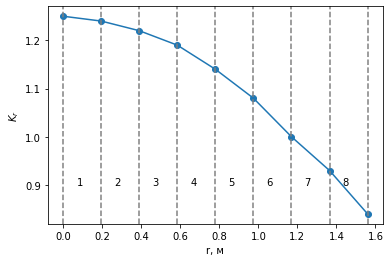

In [15]:
import matplotlib.pyplot as pl
from coursache import print_latex
import numpy as np
# from scipy.special import j0

R_az = 1.56
delta_eff = 10 * 10 ** -2

def split_r_by_n(r, n) -> np.ndarray:
    return np.array([ (r / n) * i for i in range(n+1) ])


grid = split_r_by_n(R_az, 8)

# def K_z_ref(r):
    # return - r ** 2 + 1.25
 #    return j0(2.4048 / (R_az + delta_eff) * r) + 0.25
def Podgon(r): 
    return - 0.17369 * r ** 2 + 1.25



# ref_plot = (grid) , # K_z_ref(grid))

# K_zs = (lambda r: - r ** 2 + 1)(grid) # np.array([1, 0.9, 0.8, 0.6, 0.5, 0.3, 0.25, 0.2, 0.1 ])

K_zs = [1.25, 1.248, 1.22, 1.17 , 1.1,
       1.02, 0.95, 0.88, 0.8]

K_zs = np.round(Podgon(grid), decimals=2)
K_zs = [1.25, 1.24, 1.22, 1.19, 1.14, 1.08, 1, 0.93, 0.84]
print(repr(K_zs))
# K_zs = K_z_ref(grid)

Tvses = np.array([0, 1, 6, 12, 18, 24, 30, 36, 36])

Tvses_total = sum(K_zs[i] * Tvses[i] for i in range(8 + 1))
print_latex(fr"$\sum K_r^iN^i={Tvses_total}$")

K_z_podgon = (grid, K_zs)


# pl.plot(*ref_plot)
# pl.scatter(*ref_plot)

pl.scatter(*K_z_podgon)
pl.plot(*K_z_podgon)

for n, i in enumerate(grid, start=1):
    pl.axvline(i, linestyle='--', color="gray")
    if n <= 8:
        pl.text(i + R_az / 8 / 2 - 0.03, 0.9, f"{n}")
pl.xlabel('r, м')
pl.ylabel('$K_r$')
K_rs = K_zs[1:]
save = input("press f to save"); pl.savefig("fig/Kr.png", dpi=1000) if save == "f" else print("not saved")

In [109]:
grid

array([0.   , 0.195, 0.39 , 0.585, 0.78 , 0.975, 1.17 , 1.365, 1.56 ])

In [16]:
from math import pi as π
from math import cos
H_az = 3.5
Q_az = 2.904 * 10 ** 3
split = 30
grid_z = [- H_az / 2 + H_az / split / 2 * (2 * n + 1) for n in range(30)]

def Kz(z):
    Kz = 1.5
    Heff = 3.715
    return Kz * cos (π * z / Heff)

K_zs = np.array(list(map(Kz, grid_z)))

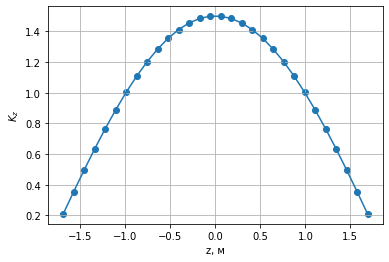

In [23]:
pl.plot(grid_z, K_zs)
pl.scatter(grid_z, K_zs)
pl.xlabel("z, м")
pl.ylabel("$K_z$")
pl.grid()
save = input("press f to save"); pl.savefig("fig/Kz.png", dpi=1000) if save == "f" else print("not saved")


In [156]:
import pandas as pd

Q_txt = pd.read_csv("tools/TRETON/Q6.txt", sep=r"\s+", header=None)
Q_txt.head()

r_split = [
    [82],  # 1 белый
    [68, 69, 83, 96, 95, 81],  # 2 фиолетовый
    [54, 55, 56, 70, 84, 97, 110, 109, 108, 94, 80, 67],
    [41, 42, 43, 44, 57, 71, 85, 98, 111, 123, 122, 121, 120, 107, 93, 79, 66, 53],
    [29, 30, 31, 32, 33, 45, 58, 72, 86, 99, 112, 124, 135, 134, 133, 132, 131, 119, 106, 92, 78, 65, 52, 40],
    [18, 19, 20, 21, 22, 23, 34, 46, 59, 73, 87, 100, 113, 125, 136, 146, 145, 144, 143, 142, 141, 130, 118, 105, 91, 77, 64, 51, 39, 28],
    [8, 9, 10, 11, 12, 13, 14, 24, 35, 47, 60, 74, 88, 101, 114, 126, 137, 147, 156, 155, 154, 153, 152, 151, 150, 140, 129, 117, 104, 90, 76, 63, 50, 38, 27, 17],
    [1, 2, 3, 4, 5, 6, 15, 25, 36, 48, 61, 75, 102, 115, 127, 138, 148, 157, 163, 162, 161, 160, 159, 158, 149, 139, 128, 116, 103, 89, 62, 49, 37, 26, 16, 7]
]

def Q_my(file, proc = 1):
    Q_my = pd.DataFrame(np.zeros((163, 30)))
    for i in range(8):
        for j in r_split[i]:
            Q_my.iloc[j - 1] = proc * K_rs[i] * K_zs * Q_az / 163 / split
    Q_my.to_csv(file, sep= ' ', header=None, index=False)

In [4]:
from itertools import chain
T_low = 284
T_normal = 287
az_quarts = {
    'I': [1, 2, 3, 7, 8, 9, 10, 16, 17, 18, 19, 20, 26, 27, 28, 29, 30, 31, 37, 38, 39, 40, 41, 42, 49, 50, 51, 52, 53, 55, 62, 63, 64, 65, 66, 67, 68, 77, 79],
    'II': [4, 5, 6, 11, 12, 13, 14, 15, 21, 22, 23, 24, 25, 32, 33, 34, 35, 36, 43, 44, 45, 46, 47, 48, 56, 57, 58, 59, 60, 61, 69, 70, 71, 72, 73, 74, 75, 83, 85, 87, 88],
    'III': [76, 78, 80, 81, 89, 90, 91, 92, 93, 94, 95, 103, 104, 105, 106, 107, 108, 116, 117, 118, 119, 120, 121, 128, 129, 130, 131, 132, 139, 140, 141, 142, 143, 149, 150, 151, 152, 158, 159, 160],
    'IV': [84, 86, 96, 97, 98, 99, 100, 101, 102, 109, 110, 111, 112, 113, 114, 115, 122, 123, 124, 125, 126, 127, 133, 134, 135, 136, 137, 138, 144, 145, 146, 147, 148, 153, 154, 155, 156, 157, 161, 162, 163]
}
DISABLED_QUARTS = 'I', 'IV'
disabled_cells_i = set(chain.from_iterable(az_quarts[q] for q in DISABLED_QUARTS))

Ts = pd.Series(np.full((163,), T_normal))
for i in range(163):
    if i + 1 in disabled_cells_i:
        Ts[i] = T_low
Ts.to_csv("T_IN.txt", sep=" ", index=False, header=False)

In [5]:
THEHYCO_P_OUT = 15691054

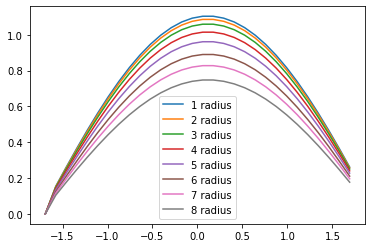

In [59]:
nominal = pd.read_csv("Q_nominal_result.dat", sep="\s+", header=None)

Q_z_by_r = [nominal.iloc[np.array(r_split[i]) - 1].mean().values for i in range(8)]
for i in range(8):
    pl.plot(grid_z, Q_z_by_r[i][1:-1], label=f"{i+1} radius")
pl.legend()

In [88]:
Q_z_by_r

[array([0.    , 0.    , 0.1544, 0.2614, 0.3658, 0.4667, 0.563 , 0.6539,
        0.7384, 0.8157, 0.8851, 0.9459, 0.9975, 1.0394, 1.0712, 1.0925,
        1.1032, 1.1032, 1.0925, 1.0712, 1.0394, 0.9975, 0.9459, 0.8851,
        0.8157, 0.7384, 0.6539, 0.563 , 0.4667, 0.3658, 0.2614, 0.1544]),
 array([0.    , 0.    , 0.1519, 0.2572, 0.3599, 0.4592, 0.554 , 0.6434,
        0.7265, 0.8026, 0.8709, 0.9307, 0.9814, 1.0226, 1.0539, 1.0749,
        1.0855, 1.0855, 1.0749, 1.0539, 1.0226, 0.9814, 0.9307, 0.8709,
        0.8026, 0.7265, 0.6434, 0.554 , 0.4592, 0.3599, 0.2572, 0.1519]),
 array([-2.31296463e-17,  1.85037171e-17,  1.48200000e-01,  2.50800000e-01,
         3.51100000e-01,  4.47900000e-01,  5.40300000e-01,  6.27500000e-01,
         7.08600000e-01,  7.82900000e-01,  8.49400000e-01,  9.07800000e-01,
         9.57300000e-01,  9.97500000e-01,  1.02800000e+00,  1.04850000e+00,
         1.05880000e+00,  1.05880000e+00,  1.04850000e+00,  1.02800000e+00,
         9.97500000e-01,  9.57300000e-01

Text(0, 0.5, 'Q, Вт')

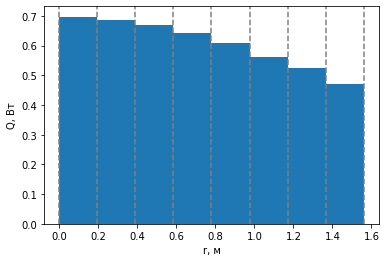

In [151]:
# pl.plot([R_az / 8 / 2 * (2 * n ) for n in range(8)], list(map(np.mean, Q_z_by_r)))
pl.bar([R_az / 8 / 2 * (2 * n ) + R_az / 8 / 2 for n in range(8)], list(map(np.mean, Q_z_by_r)), width=R_az / 8)
for i in grid:
    pl.axvline(i, linestyle='--', color="gray")
pl.xlabel("r, м")
pl.ylabel("Q, Вт")

In [114]:
nominal.iloc[81]

0     0.0000
1     0.0000
2     0.1544
3     0.2614
4     0.3658
5     0.4667
6     0.5630
7     0.6539
8     0.7384
9     0.8157
10    0.8851
11    0.9459
12    0.9975
13    1.0394
14    1.0712
15    1.0925
16    1.1032
17    1.1032
18    1.0925
19    1.0712
20    1.0394
21    0.9975
22    0.9459
23    0.8851
24    0.8157
25    0.7384
26    0.6539
27    0.5630
28    0.4667
29    0.3658
30    0.2614
31    0.1544
Name: 81, dtype: float64

In [43]:
grid

array([0.   , 0.195, 0.39 , 0.585, 0.78 , 0.975, 1.17 , 1.365, 1.56 ])

In [157]:
Q_my("Q_povish.txt", 1.2)